# <center>ALGORYTMY ZACHŁANNE</center>

1. Idea algorytmów zachłannych.
 - podejmij "nalepszą lokalną decyzję", nie patrząc czy w przyszłości będzie ona zła, i miej nadzieję, że to zadziała.

Przykładowy algorytm zachłanny - $\text{Algorytm Kruskala}$

Uwagi:
 - często algorytmy tego typu nie dają optymalnego rozwiązania, ale czasem są tak
 - często bardzo szybkie
 - czasem dają dobre rozwiązanie przybliżone
 - cięzki dowód poprawności

2. Problem wyboru zadań.

Dane:
 - Zbiór przedziałów symbolizujących zadania do wykonania, każde ma czas rozpoczęcia i zakończenia (końce przedziałów): </br></br>
 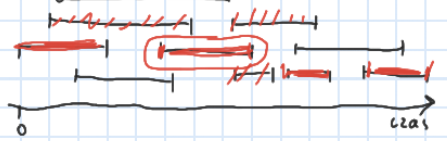

Zadanie:
 - Ile maksymalnie zadań jesteśmy w stanie wykonać? (Ile jesteśmy w stanie wybrać niepokrywających się przedziałów?)

Pomysły:
 - wybieramy najkrótsze przedziały - kontrprzykład: </br></br>
 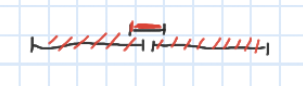
 - wybieramy przedział zaczynający się najwcześniej - kontrprzykład: </br></br>
 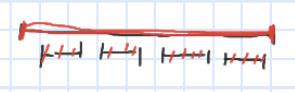
 - wybieramy przedział, który generuje najmniej konfliktów - kontrprzykład: </br></br>
 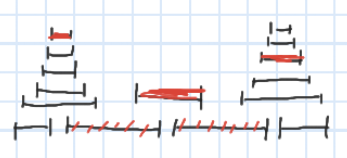
 - wybieramy przedział kończący się najwcześniej $\leftarrow$ rozwiązanie poprawne
 - wybieramy krótszy spośród "$\textcolor{olive}{\text{kończący się najwcześniej}}$", "$\textcolor{cyan}{\text{startujący najpóźniej}}$":
   - rozwiązanie też poprawne jako, że ma symetryczną własność (przy odwróceniu osi czasu jest te zadania zamieniają się typami), jednak posiada dodaktowe ("niepotrzebne") kryterium wyboru. </br></br>
   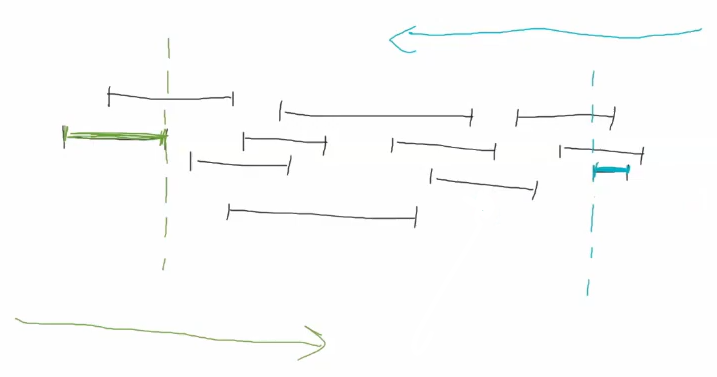

Dowód poprawności: 
 - weźmy pewne rozwiązanie optymalne ($\color{red}\bullet$): 
 - dołączmy do tego rozwiązania przedział kończący się najwcześniej ($\color{blue}\bullet$): </br></br>
 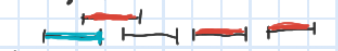
 - usuń powstałe konflikty $\rightarrow$ jest dokładne jeden:
    - gdyby nie było konfliktu, to rozwiązanie pierwotne nie byłoby optymalne
    - gdyby było więcej konfliktów, to wcześniej byłby dodatkowy przedział, co jest sprzeczne, bo kończyłby się wcześniej od właśnie dodanego
 - kolejne kroki indukcyjnie


2. Kody Huffmana.

Kod binarny (kodujący napis) z symbolami różnej długości nie musi być optymalny.

Przykład: </br></br>
$\begin{matrix} \text{symbole:} & a & b & c & d & e \\ \text{częstości:} & 700 & 200 & 120 & 300 & 10 \\ \text{kod:} & 000 & 001 & 010 & 011 & 100 \end{matrix}$

Na każdy z sybmoli używamy $3$ bitów, więc w sumie kosztuje nas to: $1330 \cdot 3 = 3990$ bitów.

Inny kod: </br></br>
$\begin{matrix} \text{symbole:} & a & b & c & d & e \\ \text{częstości:} & 700 & 200 & 120 & 300 & 10 \\ \text{kod:} & 0 & 110 & 1110 & 10 & 1111 \end{matrix}$

W tym przypadku kosztuje nas to: $700+600+480+600+40=2420$ bitów. Zatem jest to optymalniejsze rozwiązanie.

Dlaczego to jest poprawne/działa?
 - jest to $\text{kod prefiksowy}$, czyli żaden kod symbolu nie jest prefiksem innego kodu.

Możemy stworzyć drzewo opcji: </br></br>
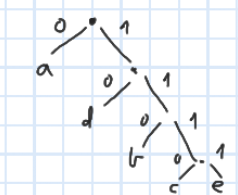


Naturalny algorytm zachłanny tworzenia kodu Huffmana.
 - weź dwa symbole ($x,y$) o najmniejszej częstości: </br></br>
 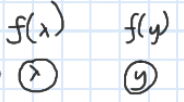
 - połącz je w jeden nowy symbol $z$ o sumie częstości $x$ i $y$: </br></br>
 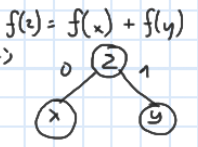

Przykład: </br></br>
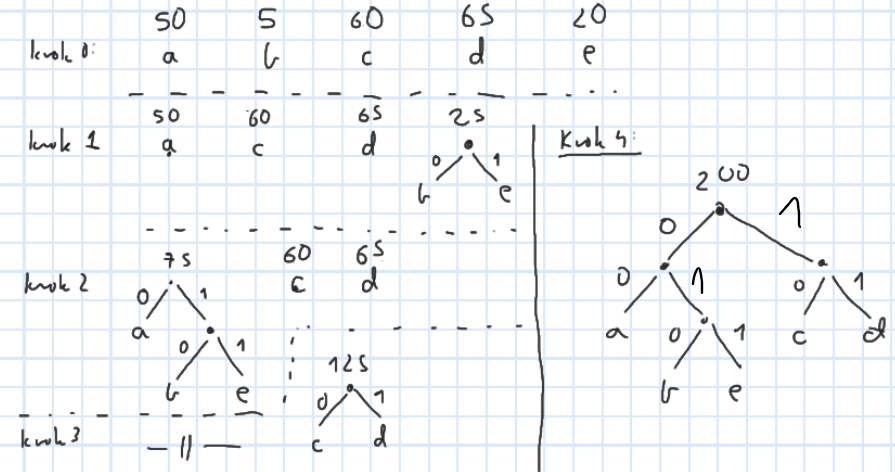

Dowód poprawności:
 - $T$ - drzewo kodujące
 - $B(T)$ - koszt drzewa
 - $B(T)$ - $\sum_{s}{f(s)} \cdot d_{t}(s)$
    - $f(s)$ - częstość $s$
    - $d_{t}(s)$ - długość kodu $s$ w drzewie $T$ 

Krok $1$: Dwa najrzadsze symbole można umieścić we wspólnym węźle.
 - $a,b$ - symbole na najdłuższej ścieżce
 - $x,y$ - najrzadsze symbole

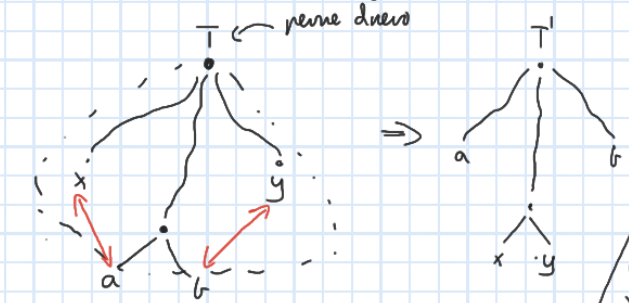

 - $B(T')=B(T)-f(a)d_{t}(a)+f(a)d_{t}(x)-f(b)d_{t}(b)+f(b)d_{t}(y)-f(x)d_{t}(x)+f(x)d_{t}(a)-f(y)d_{t}(y)+f(y)d_{t}(b)$ </br>
    $=B(T)+d_{t}(a)[f(x)-f(a)]+d_{t}(b)[f(y)-f(b)]+d_{t}(x)[f(a)-f(x)]+d_{t}(y)[f(b)-f(y)]$ </br>
    $=B(T)+\underset{\leqslant 0}{[f(x)-f(a)]}\underset{\geqslant 0}{[d_{t}(a)-d_{t}(x)]}+\underset{\geqslant 0}{[f(y)-f(b)]}\underset{\leqslant 0}{[d_{t}(b)-d_{t}(y)]}$</br>
    $\leqslant B(T)$

Krok $2$: Optymalna podstruktura.
 - mając drzewo $T$ z symbolem $z$, które ma dzieci $x,y$, razem tworzące drzewo $T'$, to: $B(T)=B(T)+f(x)+f(y)$ </br></br>
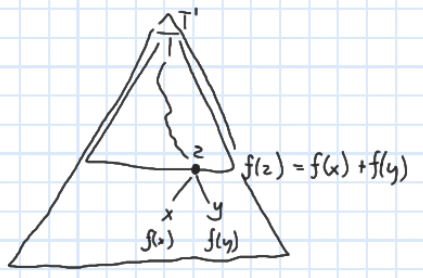

3. Problem plecakowy (dyskretny/ciągły).

Dane: mamy zbiór przedmiotów $I=\{0, ...,n-1\}$
 - Każdy z nich ma wagę $m: I \rightarrow \N$ - wagi
 - oraz cenę $v: I \rightarrow \N$ - cena
 - $M \in \N$ - maksymalna waga

Należy znaleźć podzbiór przedmiotów, których łączna waga nie przekracza $B$ i których łączna cena jest maksymalna.

Wersja dyskretna: przedmiot bierzemy lub nie - problem dynamiczny

Wersja ciągła: można brać fragmenty przedmiotów - problem zachłanny
 - wybieramy przedmioty o najlepszym stosunku ceny do wagi

Uwaga!
 - podejście zachłanne jest poprawne dla wersji ciągłej, ale nie dla dysktretnego: 
   - algorytm zachłanny wybrałby przedmiot nr $1$, jako że ma najlepszy stosunek ceny do wagi ($\frac{70}{70}$), przysłania to jednak optymalne rozwiązanie - zabranie dwóch przedmiotów o gorszym stosunku($\frac{55}{60}$, $\frac{35}{40}$), ale sumarycznie lepszej wartości 
   - analogicznie dla ogólnego przypadku - wzięcie stosunku $\frac{2}{2}$ zamiast $\frac{M-1}{M}$ </br></br>
    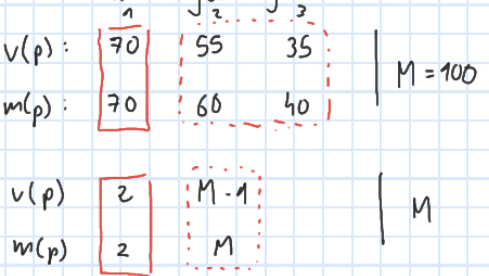
  
Algorytm zachłanny $2$: wybieramy najcenniejsze przedmioty

Uwaga!
 - kontprzykład - zblokowanie wyboru wielu przedmiotów o jednostkowo mniejszej, ale sumarycznie większej wartości od wartości przysłaniającego przedmiotu: </br></br>
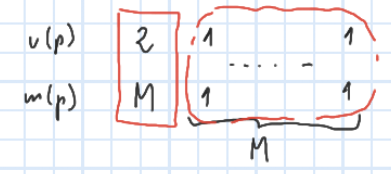




